# Tests for duplicates and other errors
- at the beginning, some models had submitted files were different experiments had identical values
- this notebooks identified the errors, now **I removed manually all duplicate files -> so the tests should run without errors**

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

rgi_regs = []
for rgi_reg in np.arange(1,20,1):
    if rgi_reg < 10:
        rgi_reg = '0'+str(rgi_reg)
    else:
        rgi_reg = str(rgi_reg)
    rgi_regs.append(rgi_reg)

In [4]:
out_path = '/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_mar14_models_all_rgi_regions_sum.nc'

ds_reg_models = xr.open_dataset(out_path)

In [5]:
ds_reg_models_stack = ds_reg_models.stack(exps =('gcm','rgi_reg',
                                                     'period_scenario', 'model_author'))
# test if all the experiments are unique
# for volume_m3
unq, count = np.unique(ds_reg_models_stack.volume_m3.values, axis=1, return_counts=True)
assert np.shape(ds_reg_models_stack.volume_m3.values) == np.shape(unq)
assert np.all(count==1)
# for area_m2
unq, count = np.unique(ds_reg_models_stack.area_m2.values, axis=1, return_counts=True)
assert np.shape(ds_reg_models_stack.area_m2.values) == np.shape(unq)
assert np.all(count==1)

### If this fails, can check it for single authors:

In [7]:
ds_reg_models_sel = ds_reg_models.sel(model_author=['Huss'])#.isel(rgi_reg=4)
ds_reg_models_stack = ds_reg_models_sel.stack(exps =('gcm', 'rgi_reg',
                                                     'period_scenario', 'model_author'))
# test if all the experiments are unique
# for volume_m3
unq, count = np.unique(ds_reg_models_stack.volume_m3.values, axis=1, return_counts=True)
assert np.shape(ds_reg_models_stack.volume_m3.values) == np.shape(unq)
assert np.all(count==1)
# for area_m2
unq, count = np.unique(ds_reg_models_stack.area_m2.values, axis=1, return_counts=True)
assert np.shape(ds_reg_models_stack.area_m2.values) == np.shape(unq)
assert np.all(count==1)

In [9]:
#ds_reg_models_stack.dropna(dim='exps').volume_m3.isel(simulation_year=100).unstack().isel(gcm=-1)
#unq[100][count>1]
pathi = './Huss/duplicates_manual/Huss_rgi01_sum_2021-2040_ukesm1-0-ll_ssp585.nc'
ds1 = xr.open_dataset(pathi).volume_m3

pathi = './Huss/duplicates_manual/Huss_rgi01_sum_2081-2100_ukesm1-0-ll_ssp585.nc'
ds2 = xr.open_dataset(pathi).volume_m3
assert np.all(ds1 == ds2)

In [12]:
# ds_reg_models_stack.dropna(dim='exps').volume_m3.isel(simulation_year=100).unstack().isel(gcm=-1)

pathi = './Huss/duplicates_manual/Huss_rgi04_sum_1851-1870_ukesm1-0-ll_hist.nc'
ds1 = xr.open_dataset(pathi).volume_m3

pathi2 = './Huss/duplicates_manual/Huss_rgi04_sum_1995-2014_ukesm1-0-ll_hist.nc'
ds2 = xr.open_dataset(pathi2).volume_m3
assert np.all(ds1 == ds2)

In [11]:
# ds_reg_models_stack.dropna(dim='exps').volume_m3.isel(simulation_year=100).unstack().isel(gcm=-1)

pathi = './Huss/duplicates_manual/Huss_rgi05_sum_1851-1870_ukesm1-0-ll_hist.nc'
ds1 = xr.open_dataset(pathi).volume_m3

pathi = './Huss/duplicates_manual/Huss_rgi05_sum_1995-2014_ukesm1-0-ll_hist.nc'
ds2 = xr.open_dataset(pathi).volume_m3
assert np.all(ds1 == ds2)

### OLD: if this fails, we can check like that what fails!

In [10]:
for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-2]):
    for gcm in['gfdl-esm4', 'psl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']:
        for period in ['2021-2040', '2041-2060', '2061-2080', '2081-2100']:
            try:
                _ds1 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Compagno/Compagno_rgi{rgi_reg}_sum_{period}_{gcm}_ssp585.nc').volume_m3
                _ds2 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Compagno/Compagno_rgi{rgi_reg}_sum_{period}_{gcm}_ssp126.nc').volume_m3
                _ds3 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Compagno/Compagno_rgi{rgi_reg}_sum_{period}_{gcm}_ssp370.nc').volume_m3
                np.testing.assert_allclose(_ds1,_ds2)
                np.testing.assert_allclose(_ds1,_ds3)
                print(f'duplicates for {period} and RGI reg{rgi_reg} for gcm: {gcm} ')
            except:
                pass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

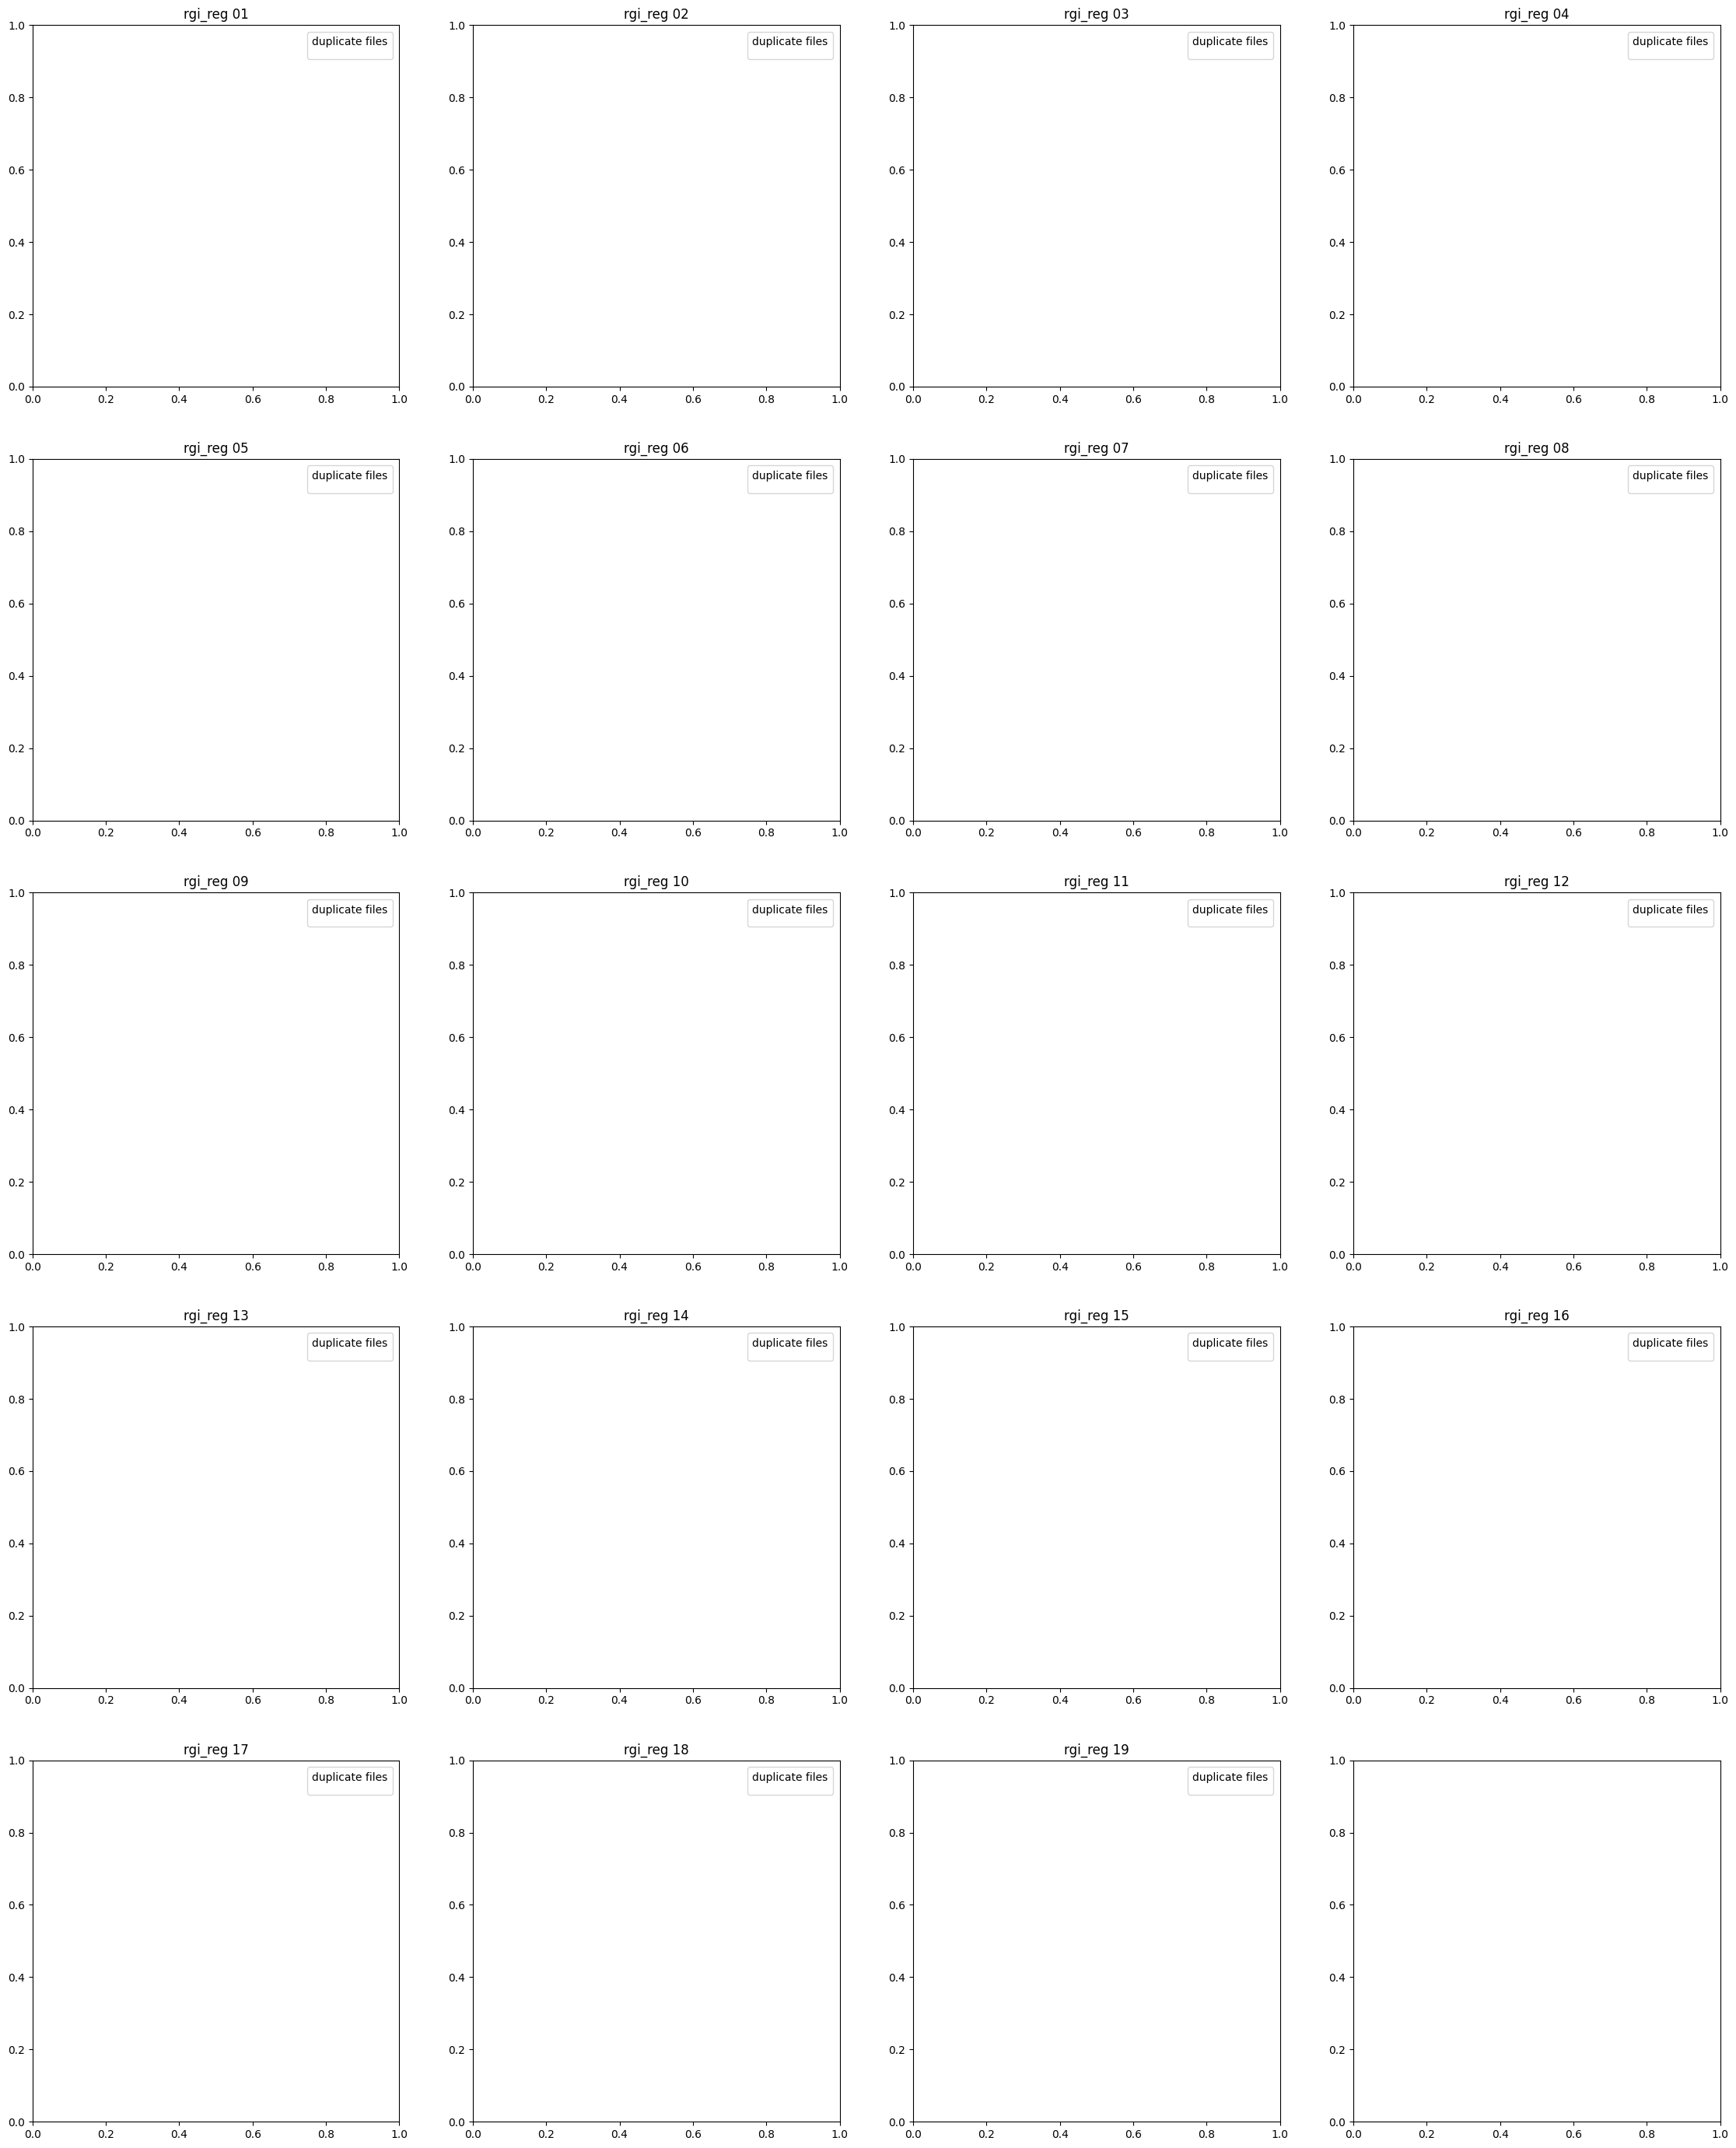

In [11]:
fig, axs = plt.subplots(5,4,figsize=(28,35))
for j, rgi_reg in enumerate(rgi_regs):
    if j<4:
        ax = axs[0][j]
    elif j <8:
        ax = axs[1][j-4]
    elif j <12:
        ax = axs[2][j-8]
    elif j <16:
        ax = axs[3][j-12]
    elif j <20:
        ax = axs[4][j-16]
    for gcm in['gfdl-esm4', 'ipsl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']:
        for period in ['2021-2040', '2041-2060', '2061-2080', '2081-2100']:
            try:
                _ds1 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp585.nc').volume_m3
                _ds2 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp126.nc').volume_m3
                _ds3 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp370.nc').volume_m3
                np.testing.assert_allclose(_ds1,_ds2)
                np.testing.assert_allclose(_ds1,_ds3)
                ax.plot(_ds2, label=f'{gcm}_{period}_ssp126')
                ax.plot(_ds3, label=f'{gcm}_{period}_ssp370')
                ax.plot(_ds1, label=f'{gcm}_{period}_ssp585')
                print(f'duplicates for {period} and RGI reg{rgi_reg} for gcm: {gcm} ')
            except:
                pass
    ax.set_title(f'rgi_reg {rgi_reg}')
    ax.legend(title='duplicate files', fontsize=12,ncol=1)

In [ ]:
for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-2]):
    for gcm in['gfdl-esm4', 'psl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']:
        for period in ['2021-2040', '2041-2060', '2061-2080', '2081-2100']:
            try:
                _ds1 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Compagno/Compagno_rgi{rgi_reg}_sum_{period}_{gcm}_ssp585.nc').volume_m3
                _ds2 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Compagno/Compagno_rgi{rgi_reg}_sum_{period}_{gcm}_ssp126.nc').volume_m3
                _ds3 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Compagno/Compagno_rgi{rgi_reg}_sum_{period}_{gcm}_ssp370.nc').volume_m3
                np.testing.assert_allclose(_ds1,_ds2)
                np.testing.assert_allclose(_ds1,_ds3)
                print(f'duplicates for {period} and RGI reg{rgi_reg} for gcm: {gcm} ')
            except:
                pass

duplicates for 2021-2040 and RGI reg01 for gcm: mpi-esm1-2-hr 
duplicates for 2041-2060 and RGI reg01 for gcm: mpi-esm1-2-hr 
duplicates for 2061-2080 and RGI reg01 for gcm: mpi-esm1-2-hr 
duplicates for 2081-2100 and RGI reg01 for gcm: mpi-esm1-2-hr 
duplicates for 2021-2040 and RGI reg01 for gcm: mri-esm2-0 
duplicates for 2041-2060 and RGI reg01 for gcm: mri-esm2-0 
duplicates for 2061-2080 and RGI reg01 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg01 for gcm: mri-esm2-0 
duplicates for 2021-2040 and RGI reg02 for gcm: mpi-esm1-2-hr 
duplicates for 2041-2060 and RGI reg02 for gcm: mpi-esm1-2-hr 
duplicates for 2061-2080 and RGI reg02 for gcm: mpi-esm1-2-hr 
duplicates for 2081-2100 and RGI reg02 for gcm: mpi-esm1-2-hr 
duplicates for 2021-2040 and RGI reg02 for gcm: mri-esm2-0 
duplicates for 2041-2060 and RGI reg02 for gcm: mri-esm2-0 
duplicates for 2061-2080 and RGI reg02 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg02 for gcm: mri-esm2-0 
duplicates for 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


duplicates for 2021-2040 and RGI reg07 for gcm: mri-esm2-0 
duplicates for 2041-2060 and RGI reg07 for gcm: mri-esm2-0 
duplicates for 2061-2080 and RGI reg07 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg07 for gcm: mri-esm2-0 
duplicates for 2021-2040 and RGI reg08 for gcm: mri-esm2-0 
duplicates for 2041-2060 and RGI reg08 for gcm: mri-esm2-0 
duplicates for 2061-2080 and RGI reg08 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg08 for gcm: mri-esm2-0 
duplicates for 2021-2040 and RGI reg09 for gcm: mri-esm2-0 
duplicates for 2041-2060 and RGI reg09 for gcm: mri-esm2-0 
duplicates for 2061-2080 and RGI reg09 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg09 for gcm: mri-esm2-0 
duplicates for 2021-2040 and RGI reg10 for gcm: mri-esm2-0 
duplicates for 2041-2060 and RGI reg10 for gcm: mri-esm2-0 
duplicates for 2061-2080 and RGI reg10 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg10 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg11 f

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


duplicates for 2021-2040 and RGI reg13 for gcm: mpi-esm1-2-hr 
duplicates for 2041-2060 and RGI reg13 for gcm: mpi-esm1-2-hr 
duplicates for 2061-2080 and RGI reg13 for gcm: mpi-esm1-2-hr 
duplicates for 2081-2100 and RGI reg13 for gcm: mpi-esm1-2-hr 
duplicates for 2021-2040 and RGI reg13 for gcm: mri-esm2-0 
duplicates for 2041-2060 and RGI reg13 for gcm: mri-esm2-0 
duplicates for 2061-2080 and RGI reg13 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg13 for gcm: mri-esm2-0 
duplicates for 2021-2040 and RGI reg14 for gcm: mpi-esm1-2-hr 
duplicates for 2041-2060 and RGI reg14 for gcm: mpi-esm1-2-hr 
duplicates for 2061-2080 and RGI reg14 for gcm: mpi-esm1-2-hr 
duplicates for 2081-2100 and RGI reg14 for gcm: mpi-esm1-2-hr 
duplicates for 2021-2040 and RGI reg14 for gcm: mri-esm2-0 
duplicates for 2041-2060 and RGI reg14 for gcm: mri-esm2-0 
duplicates for 2061-2080 and RGI reg14 for gcm: mri-esm2-0 
duplicates for 2081-2100 and RGI reg14 for gcm: mri-esm2-0 
duplicates for 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


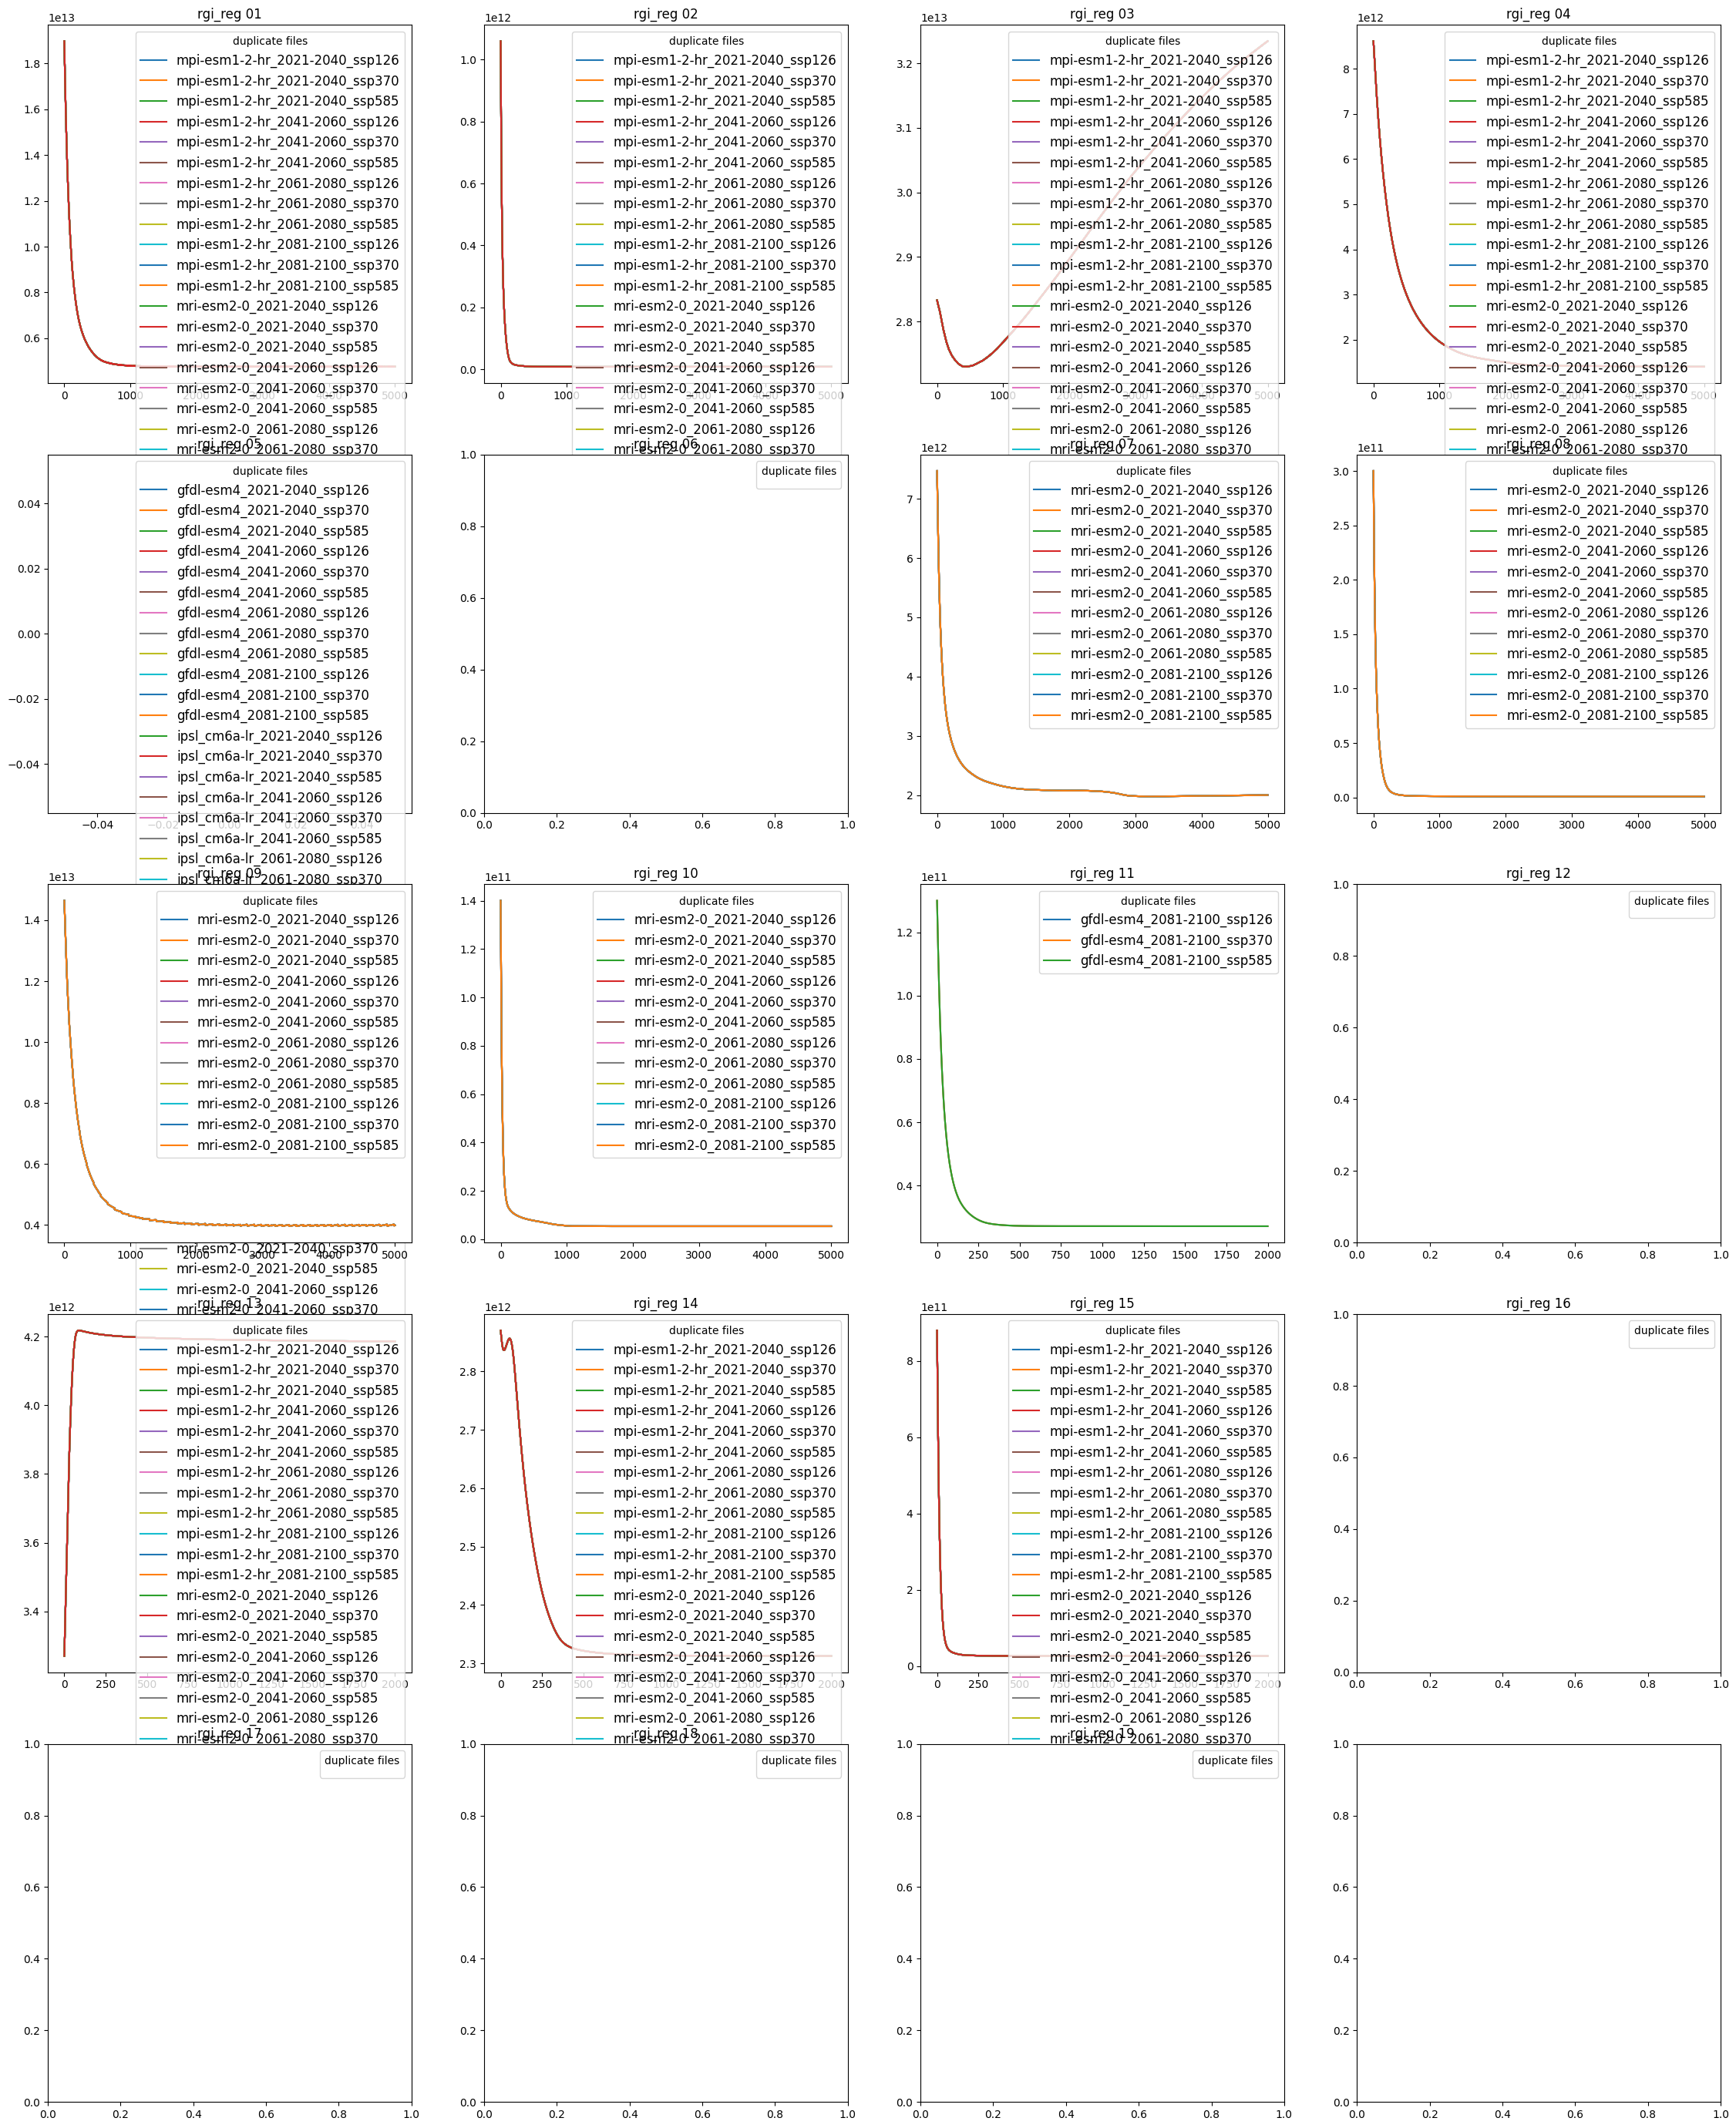

In [7]:
fig, axs = plt.subplots(5,4,figsize=(28,35))
for j, rgi_reg in enumerate(rgi_regs):
    if j<4:
        ax = axs[0][j]
    elif j <8:
        ax = axs[1][j-4]
    elif j <12:
        ax = axs[2][j-8]
    elif j <16:
        ax = axs[3][j-12]
    elif j <20:
        ax = axs[4][j-16]
    for gcm in['gfdl-esm4', 'ipsl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']:
        for period in ['2021-2040', '2041-2060', '2061-2080', '2081-2100']:
            try:
                _ds1 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp585.nc').volume_m3
                _ds2 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp126.nc').volume_m3
                _ds3 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp370.nc').volume_m3
                np.testing.assert_allclose(_ds1,_ds2)
                np.testing.assert_allclose(_ds1,_ds3)
                ax.plot(_ds2, label=f'{gcm}_{period}_ssp126')
                ax.plot(_ds3, label=f'{gcm}_{period}_ssp370')
                ax.plot(_ds1, label=f'{gcm}_{period}_ssp585')
                print(f'duplicates for {period} and RGI reg{rgi_reg} for gcm: {gcm} ')
            except:
                pass
    ax.set_title(f'rgi_reg {rgi_reg}')
    ax.legend(title='duplicate files', fontsize=12,ncol=1)

NameError: name 'ds_reg_models' is not defined

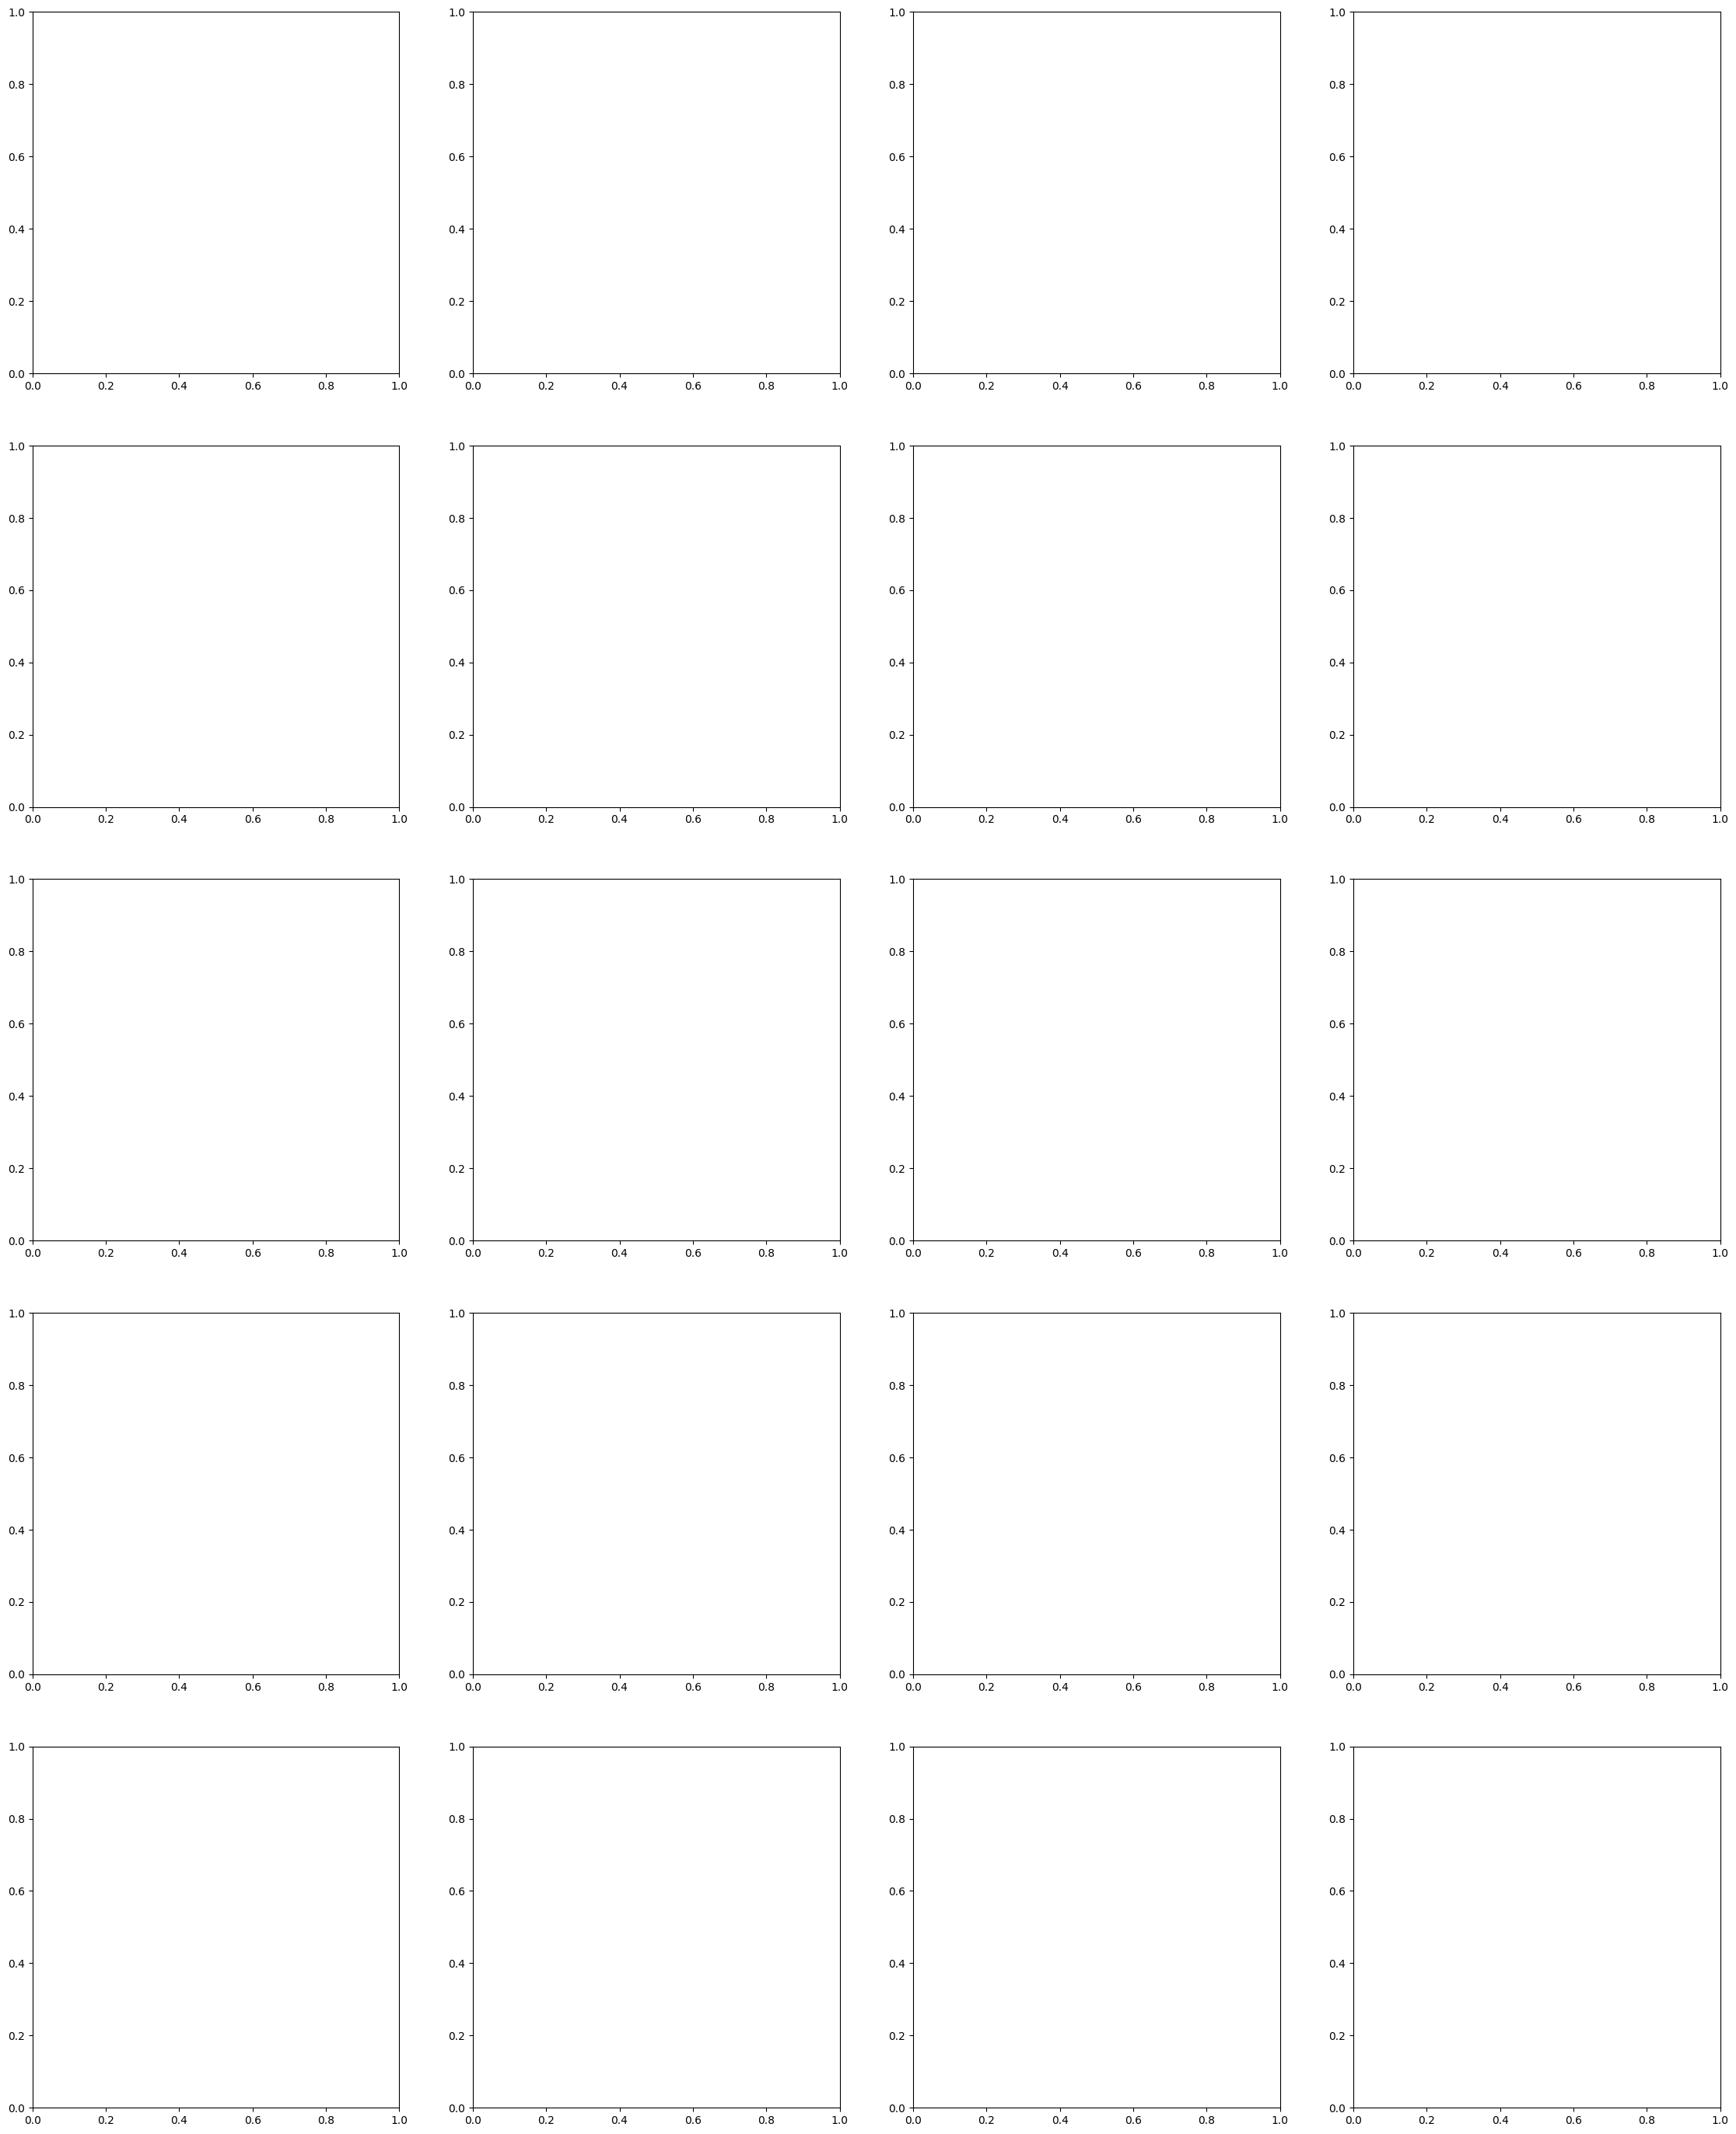

In [5]:
fig, axs = plt.subplots(5,4,figsize=(28,35))
for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    if j<4:
        ax = axs[0][j]
    elif j <8:
        ax = axs[1][j-4]
    elif j <12:
        ax = axs[2][j-8]
    elif j <16:
        ax = axs[3][j-12]
    elif j <20:
        ax = axs[4][j-16]
    for gcm in['gfdl-esm4', 'ipsl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']:
        for period in ['2021-2040', '2041-2060', '2061-2080', '2081-2100']:
            try:
                _ds1 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp585.nc').volume_m3
                _ds2 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp126.nc').volume_m3
                _ds3 = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/Huss/Huss_rgi{rgi_reg}_sum_{period}_{gcm}_ssp370.nc').volume_m3
                np.testing.assert_allclose(_ds1,_ds2)
                np.testing.assert_allclose(_ds1,_ds3)
                ax.plot(_ds2, label=f'{gcm}_{period}_ssp126')
                ax.plot(_ds3, label=f'{gcm}_{period}_ssp370')
                ax.plot(_ds1, label=f'{gcm}_{period}_ssp585')
                print(f'duplicates for {period} and RGI reg{rgi_reg} for gcm: {gcm} ')
            except:
                pass
    ax.set_title(f'rgi_reg {rgi_reg}')
    ax.legend(title='duplicate files', fontsize=12,ncol=1)

05
05
05
05


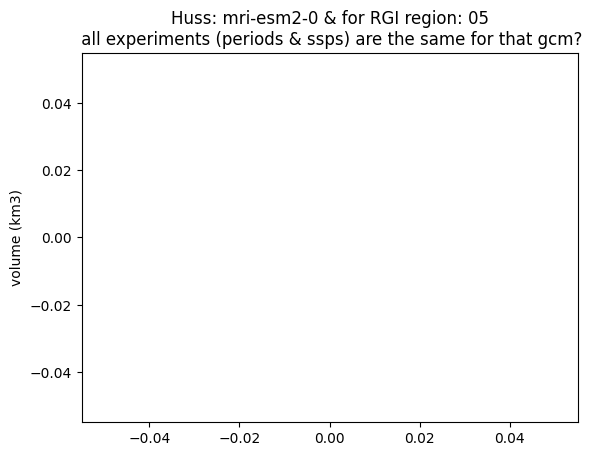

In [9]:
model_author = 'Huss'
for rgi_reg in ['05']:
    if model_author =='Compagno':
        gcm_l = ['ukesm1-0-ll', 'gfdl-esm4', 'psl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0']
    elif model_author == 'Huss':
        gcm_l = ['gfdl-esm4', 'ipsl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']

        
    plt.figure()
    for gcm in gcm_l:
        d_comp_05_problem_l = []
        ### load all volume values 
        ssp = 'hist'
        for p in ['1851-1870', '1901-1920', '1951-1970', '1995-2014']:
            p_05 = f'/home/www/lschuster/glacierMIP3_analysis/{model_author}/{model_author}_rgi{rgi_reg}_sum_{p}_{gcm}_{ssp}.nc'
            d_comp_05_problem_l.append(xr.open_dataset(p_05).volume_m3.values)
        for p in ['2021-2040', '2041-2060', '2061-2080', '2081-2100']:
            for ssp in ['ssp126', 'ssp370', 'ssp585']:
                p_05 = f'/home/www/lschuster/glacierMIP3_analysis/{model_author}/{model_author}_rgi{rgi_reg}_sum_{p}_{gcm}_{ssp}.nc'
                d_comp_05_problem_l.append(xr.open_dataset(p_05).volume_m3.values)
        try:
            # compare the first experiment with the others: 
            # are all the values for every year the same?
            for d in d_comp_05_problem_l[1:]:
                np.testing.assert_allclose(d, d_comp_05_problem_l[0])
            # if this is true, all experiments (periods & GCMs) are the same for that gcm : ukesm1-0-ll
            # visual check:
            for d in d_comp_05_problem_l:
                plt.plot(xr.open_dataset(p_05).simulation_year, d.squeeze()) #, label = gcm)
            print(rgi_reg)
            plt.title(f'{model_author}: {gcm} & for RGI region: {rgi_reg}\n all experiments (periods & ssps) are the same for that gcm?')
            plt.ylabel('volume (km3)')

        except:
            pass


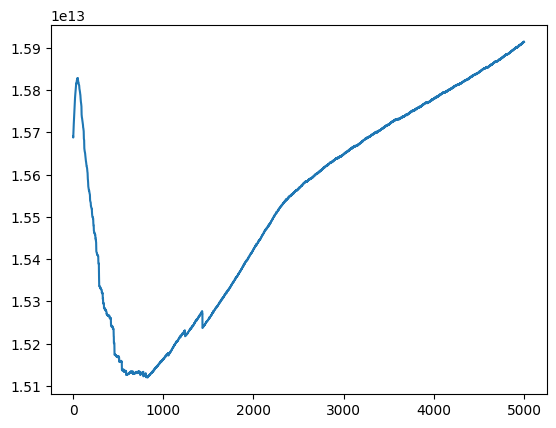

In [13]:
 plt.plot(xr.open_dataset(p_05).simulation_year, d.squeeze())

In [10]:
d_comp_05_problem_l

[array([[1.56900000e+13],
        [1.56935360e+13],
        [1.57037740e+13],
        ...,
        [1.68752995e+13],
        [1.68756905e+13],
        [1.68749746e+13]]),
 array([[1.56900000e+13],
        [1.56878515e+13],
        [1.56943330e+13],
        ...,
        [1.59151366e+13],
        [1.59149512e+13],
        [1.59142574e+13]]),
 array([[1.56900000e+13],
        [1.56986702e+13],
        [1.57164919e+13],
        ...,
        [1.75270140e+13],
        [1.75261532e+13],
        [1.75258568e+13]]),
 array([[1.56900000e+13],
        [1.56935360e+13],
        [1.57037740e+13],
        ...,
        [1.68752995e+13],
        [1.68756905e+13],
        [1.68749746e+13]]),
 array([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]),
 array([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]),
 array([[1.56900000e+13],
        [1.56945170e+13],
        [1.57057262e+13],
        ...,
        [1.6904

01
01
02
02
03
03
04
04
05
05
05
05
07
08
09
10
13
13
14
14
15
15


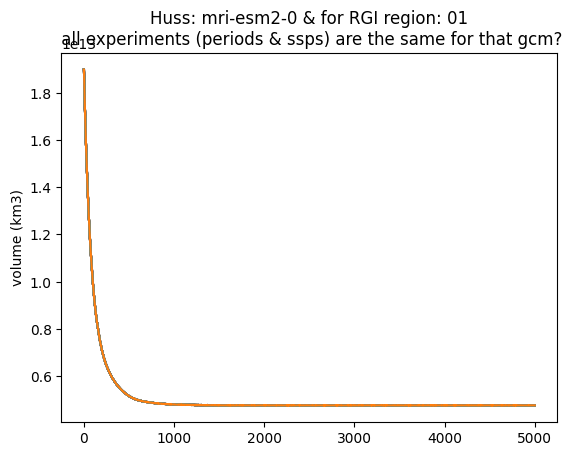

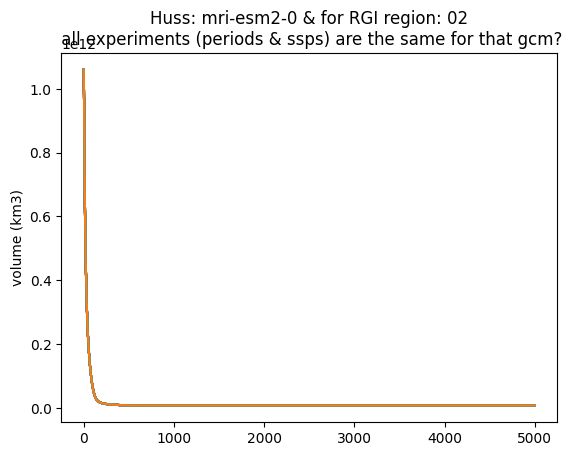

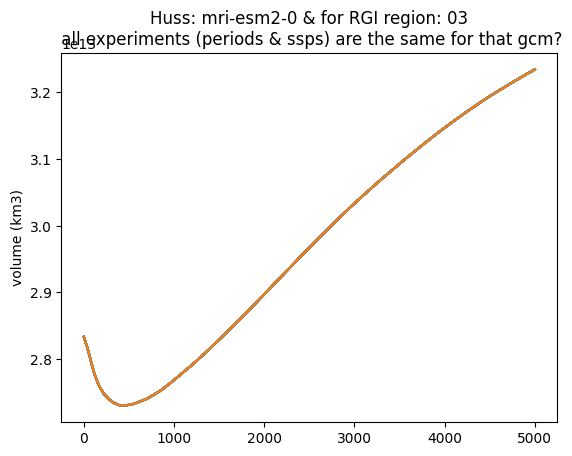

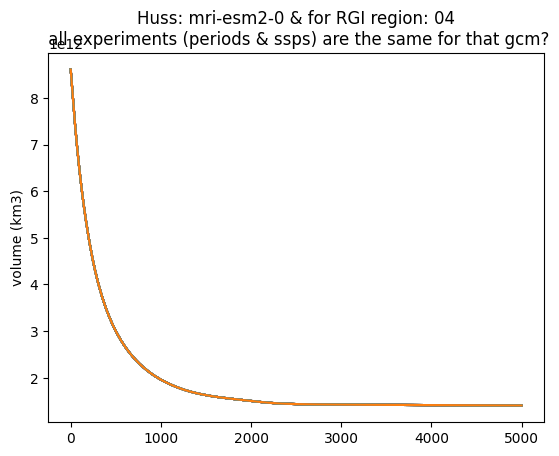

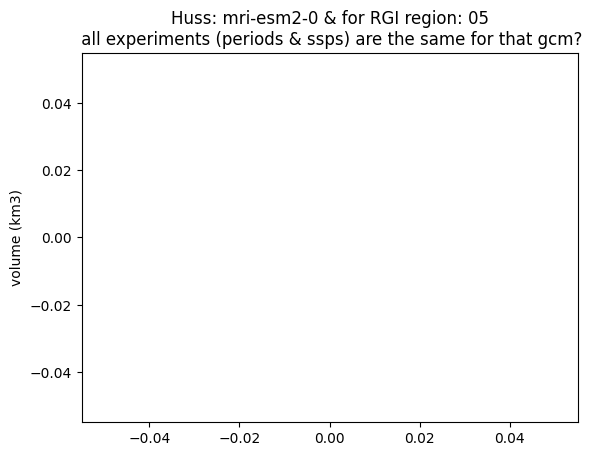

<Figure size 640x480 with 0 Axes>

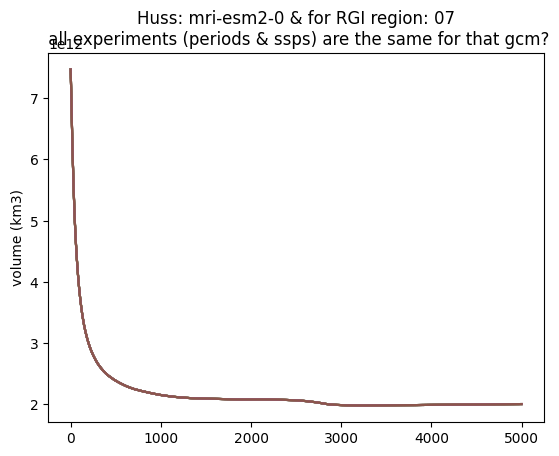

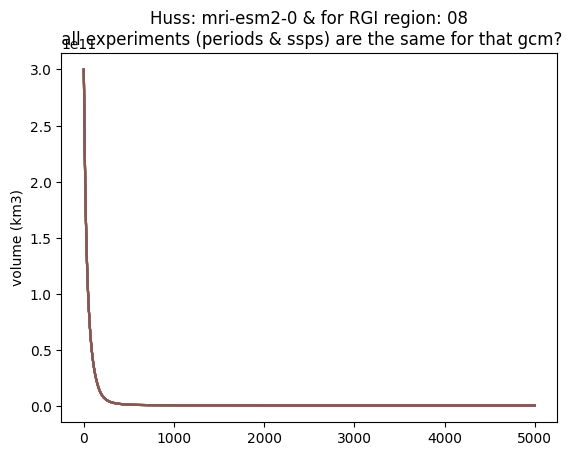

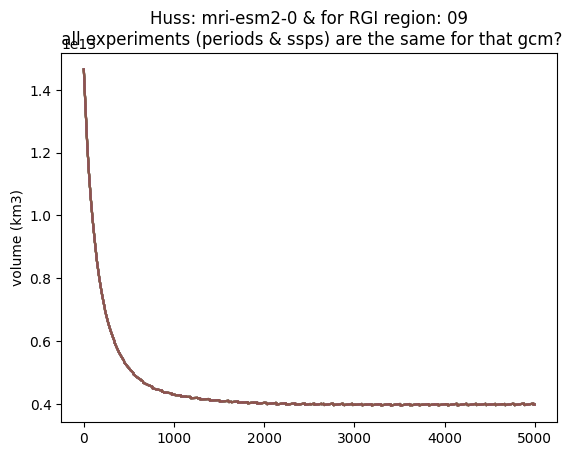

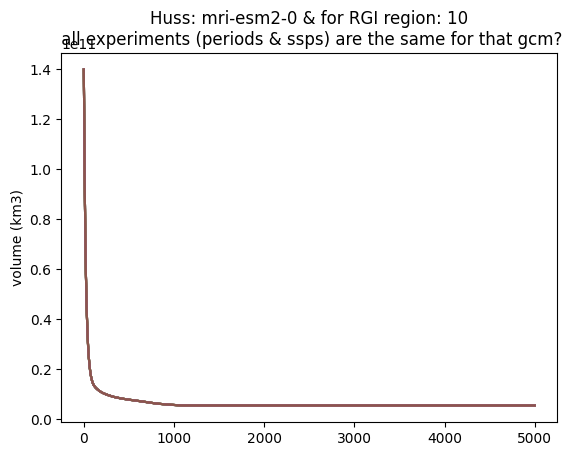

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

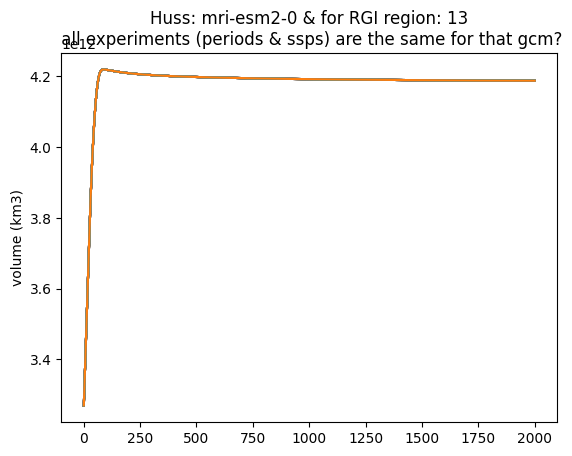

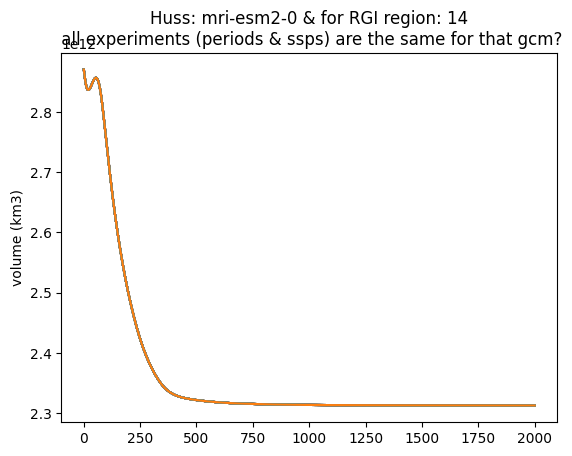

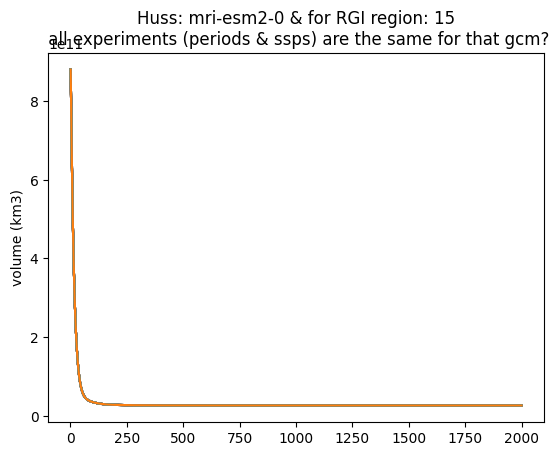

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
model_author = 'Huss'
for rgi_reg in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19']:
    if model_author =='Compagno':
        gcm_l = ['ukesm1-0-ll', 'gfdl-esm4', 'psl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0']
    elif model_author == 'Huss':
        gcm_l = ['gfdl-esm4', 'ipsl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']

        
    plt.figure()
    for gcm in gcm_l:
        d_comp_05_problem_l = []
        ### load all volume values 
        ssp = 'hist'
        for p in ['1851-1870', '1901-1920', '1951-1970', '1995-2014']:
            p_05 = f'/home/www/lschuster/glacierMIP3_analysis/{model_author}/{model_author}_rgi{rgi_reg}_sum_{p}_{gcm}_{ssp}.nc'
            d_comp_05_problem_l.append(xr.open_dataset(p_05).volume_m3.values)
        for p in ['2021-2040', '2041-2060', '2061-2080', '2081-2100']:
            for ssp in ['ssp126', 'ssp370', 'ssp585']:
                p_05 = f'/home/www/lschuster/glacierMIP3_analysis/{model_author}/{model_author}_rgi{rgi_reg}_sum_{p}_{gcm}_{ssp}.nc'
                d_comp_05_problem_l.append(xr.open_dataset(p_05).volume_m3.values)
        try:
            # compare the first experiment with the others: 
            # are all the values for every year the same?
            for d in d_comp_05_problem_l[1:]:
                np.testing.assert_allclose(d, d_comp_05_problem_l[0])
            # if this is true, all experiments (periods & GCMs) are the same for that gcm : ukesm1-0-ll
            # visual check:
            for d in d_comp_05_problem_l:
                plt.plot(xr.open_dataset(p_05).simulation_year, d.squeeze()) #, label = gcm)
            print(rgi_reg)
            plt.title(f'{model_author}: {gcm} & for RGI region: {rgi_reg}\n all experiments (periods & ssps) are the same for that gcm?')
            plt.ylabel('volume (km3)')

        except:
            pass


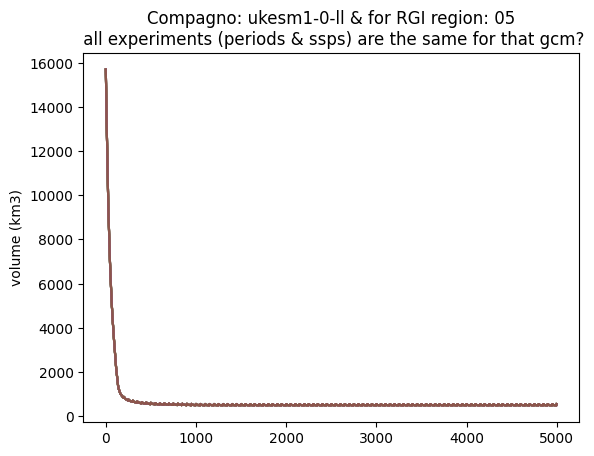

In [2]:
model_author = 'Compagno'
for rgi_reg in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19']:
    if model_author =='Compagno':
        gcm_l = ['ukesm1-0-ll', 'gfdl-esm4', 'psl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0']
    elif model_author == 'Huss':
        gcm_l = ['gfdl-esm4', 'ipsl_cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']

    for gcm in gcm_l:
        d_comp_05_problem_l = []
        ### load all volume values 
        ssp = 'hist'
        for p in ['1851-1870', '1901-1920', '1951-1970', '1995-2014']:
            p_05 = f'/home/www/lschuster/glacierMIP3_analysis/{model_author}/{model_author}_rgi{rgi_reg}_sum_{p}_{gcm}_{ssp}.nc'
            d_comp_05_problem_l.append(xr.open_dataset(p_05).volume_m3.values)
        for p in ['2021-2040', '2041-2060', '2061-2080', '2081-2100']:
            for ssp in ['ssp126', 'ssp370', 'ssp585']:
                p_05 = f'/home/www/lschuster/glacierMIP3_analysis/{model_author}/{model_author}_rgi{rgi_reg}_sum_{p}_{gcm}_{ssp}.nc'
                d_comp_05_problem_l.append(xr.open_dataset(p_05).volume_m3.values)
        try:
            # compare the first experiment with the others: 
            # are all the values for every year the same?
            for d in d_comp_05_problem_l[1:]:
                np.testing.assert_allclose(d, d_comp_05_problem_l[0])
            # if this is true, all experiments (periods & GCMs) are the same for that gcm : ukesm1-0-ll
            # visual check:
            for d in d_comp_05_problem_l:
                plt.plot(xr.open_dataset(p_05).simulation_year, d.squeeze()) #, label = gcm)
            plt.title(f'{model_author}: {gcm} & for RGI region: {rgi_reg}\n all experiments (periods & ssps) are the same for that gcm?')
            plt.ylabel('volume (km3)')

        except:
            pass
